In [71]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [72]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [73]:
class_name = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [74]:
# val 데이터 나누기

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 20)
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

In [75]:
# X 데이터 minmax scaling

X_train = X_train/255
X_test = X_test/255
X_val = X_val/255

In [76]:
# 아래와 같이 reshape 해줘야 CNN에서 오류 X
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

In [77]:
X_train.shape

(48000, 28, 28, 1)

In [78]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [23]:
# CNN은 다음 층으로 갈수록 필터 개수 증가
def build_model():
  model = keras.Sequential([
      layers.Conv2D(16, input_shape=(28, 28, 1), kernel_size = 3, activation = 'relu'),
      layers.MaxPool2D(pool_size = 2),

      layers.Conv2D(16, kernel_size = 3, activation = 'relu'),
      layers.MaxPool2D(pool_size = 2),

      #flatten
      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(10, activation = 'softmax' )
  ])
  return model

In [24]:
model = build_model()
model.summary()
#Conv2D_param = 3*3*16 + 1*16(bias)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [25]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

In [26]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val))

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.6283 - acc: 0.7722 - val_loss: 0.4404 - val_acc: 0.8428
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4131 - acc: 0.8513 - val_loss: 0.3993 - val_acc: 0.8530
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3649 - acc: 0.8677 - val_loss: 0.3519 - val_acc: 0.8723
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3365 - acc: 0.8780 - val_loss: 0.3280 - val_acc: 0.8785
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3161 - acc: 0.8856 - val_loss: 0.3212 - val_acc: 0.8782
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2974 - acc: 0.8909 - val_loss: 0.2993 - val_acc: 0.8904
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2849 - acc: 0.8959 - val_loss: 0.3058 - val_acc: 0.8848
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.

In [27]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

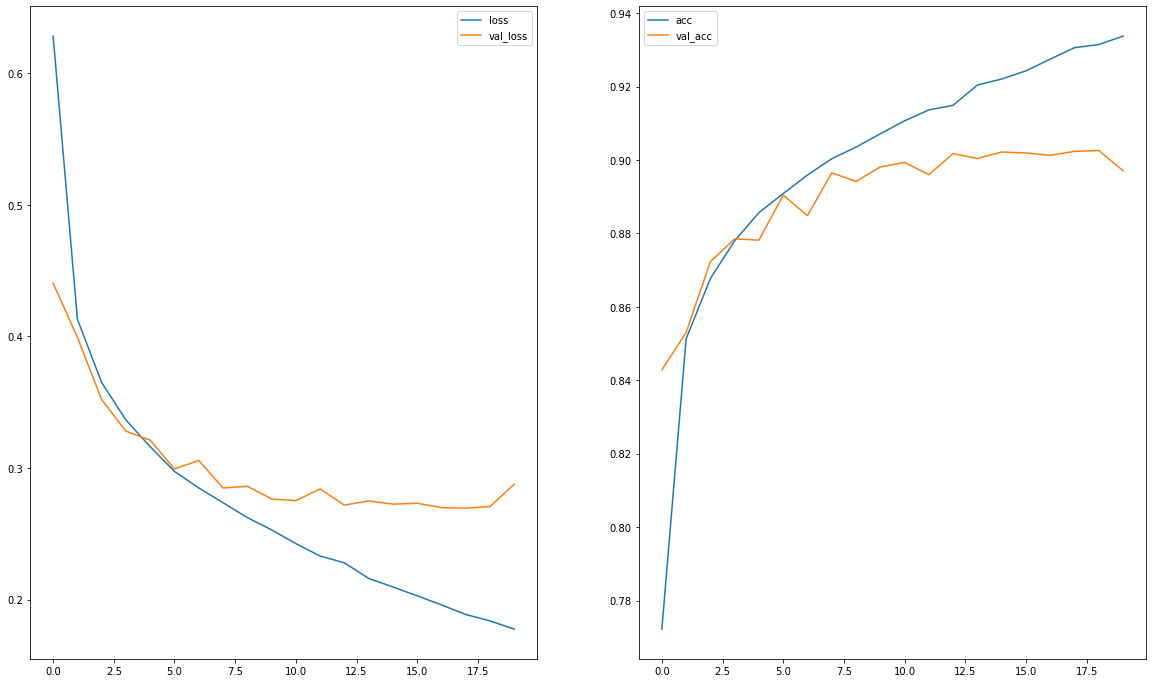

In [28]:
plot_history(history)

In [30]:
# 모델 평가

model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3247 - acc: 0.8895


[0.32467809319496155, 0.8895000219345093]

In [33]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1) # 제일 높은 값 가져오기
y_test = np.argmax(y_test, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8895

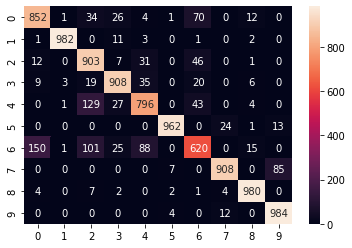

In [34]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True, fmt = 'd')

## Early_Stopping

In [38]:
model = build_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3
)

In [39]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val), callbacks = [es])

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.5996 - acc: 0.7851 - val_loss: 0.4533 - val_acc: 0.8293
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.4006 - acc: 0.8569 - val_loss: 0.3766 - val_acc: 0.8627
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3579 - acc: 0.8719 - val_loss: 0.3699 - val_acc: 0.8658
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3306 - acc: 0.8812 - val_loss: 0.3350 - val_acc: 0.8811
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3095 - acc: 0.8884 - val_loss: 0.3095 - val_acc: 0.8881
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2913 - acc: 0.8954 - val_loss: 0.3138 - val_acc: 0.8842
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2797 - acc: 0.9002 - val_loss: 0.2968 - val_acc: 0.8923
Epoch 8/20
750/750 [==============================] - 4s 5ms/step - loss: 0.

In [41]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8998

In [79]:
# CNN은 다음 층으로 갈수록 필터 개수 증가
def build_model2():
  model = keras.Sequential([
      layers.Conv2D(16, input_shape=(28, 28, 1), kernel_size = 3, activation = 'relu'),
      layers.MaxPool2D(pool_size = 2),

      layers.Conv2D(64, kernel_size = 3, activation = 'relu'),
      layers.MaxPool2D(pool_size = 2),

      #flatten
      layers.Flatten(),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(10, activation = 'softmax' )
  ])
  return model

In [80]:
model = build_model2()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# Callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3
)

mc = tf.keras.callbacks.ModelCheckpoint(
    'my_checkpoints.ckpt',
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss'
)

In [81]:
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_val, y_val), callbacks = [es, mc])

Epoch 1/20
750/750 [==============================] - 4s 4ms/step - loss: 0.5575 - acc: 0.7996 - val_loss: 0.4067 - val_acc: 0.8525
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3659 - acc: 0.8685 - val_loss: 0.3370 - val_acc: 0.8779
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.3213 - acc: 0.8844 - val_loss: 0.3259 - val_acc: 0.8835
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2897 - acc: 0.8962 - val_loss: 0.3231 - val_acc: 0.8832
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2708 - acc: 0.9022 - val_loss: 0.2807 - val_acc: 0.8995
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2498 - acc: 0.9093 - val_loss: 0.2839 - val_acc: 0.8989
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2339 - acc: 0.9135 - val_loss: 0.2789 - val_acc: 0.8981
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.

In [82]:
model.load_weights('my_checkpoints.ckpt')

In [88]:
# best 모델 저장(h5는 케라스 모델)
# save로 저장해야 weights, layers 정보들 모두 저장
model.save('my_fashion_mnist.h5')

In [89]:
my_model = keras.models.load_model('my_fashion_mnist.h5')

In [90]:
my_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

In [83]:
# 결과 시각화

def plot_history(history):
  hist = history.history
  plt.figure(figsize = (20, 12))
  plt.subplot(1, 2, 1)
  plt.plot(history.epoch, hist['loss'], label = 'loss')
  plt.plot(history.epoch, hist['val_loss'], label = 'val_loss')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(history.epoch, hist['acc'], label = 'acc')
  plt.plot(history.epoch, hist['val_acc'], label = 'val_acc')
  plt.legend()
  plt.show()

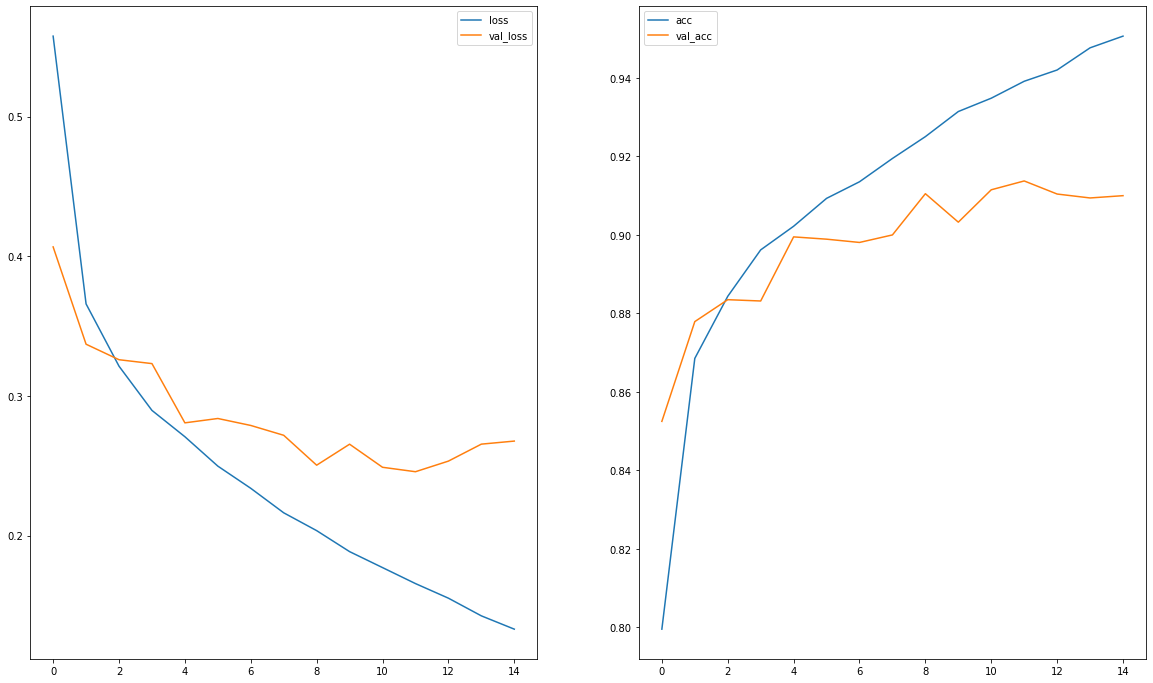

In [84]:
plot_history(history)

In [92]:
# 모델 평가

my_model.evaluate(X_test,y_test)

ValueError: ignored

In [86]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1) # 제일 높은 값 가져오기
y_test = np.argmax(y_test, axis = 1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9057

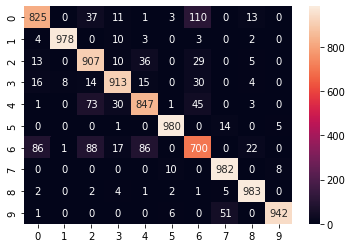

In [87]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot = True, fmt = 'd')